In [1]:
import psycopg2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

import seaborn as sns
import datetime

## Infielder DataFrames

In [5]:
#DF1=  clutch_inf_30.csv
#DF2 = clutch_inf_100.csv
#DF3 = clut_alstr_inf.csv

In [2]:
import psycopg2 as p2
conn = p2.connect(database = 'player_stats', user ='baseball_master', password = 'georgetowndata', 
                  host = 'georgetown-baseball.cnfqonxqdbry.us-east-1.rds.amazonaws.com', 
                  port = '5432')


### Non- All Star Infielders who have played at least 30 games at their position

In [3]:
query="""
select "playerID", "POS", "yearID", "G"
from fielding 
where "yearID" >= '1947'
and "POS" in ('3B','SS','2B','1B')
and "G" > 30 and "G" < 100
and "playerID" not in 
   (Select "playerID"  ---count("playerID")
        from allstar_full
        group by "playerID"
        having count("playerID") > 5)
"""

Reg_Infielder_30 = pd.read_sql_query(query, conn)

In [4]:
Reg_Infielder_30.head()

,playerID,POS,yearID,G
0,adamsbo03,2B,1947.0,69.0
1,albrija01,SS,1947.0,33.0
2,basined01,2B,1947.0,56.0
3,berarjo01,2B,1947.0,86.0
4,blattbu01,2B,1947.0,34.0


### Clutch - Impact on winning percentage 

In [5]:
query ="""

select "year" as "yearID", "batter_id" as "playerID", "event_count", "average_win_change", "center_weighted_win_change"
as "clutch_win_change"
from clutch_bat
order by "yearID"

"""

Clutch = pd.read_sql_query(query, conn)

In [7]:
Clutch.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change
0,1950.0,aberal01,3.0,0.006172,-0.003889
1,1950.0,abramca01,55.0,0.010747,-0.006012
2,1950.0,addisbo01,24.0,0.014065,-0.013327
3,1950.0,bankhda01,41.0,0.005563,-0.005630
4,1950.0,bantaja01,14.0,0.010745,-0.015449


### Merge Impact on Winning Percentage Stat with Player

In [8]:
Clutch_Infielder_30 =pd.merge(Clutch, Reg_Infielder_30, on = ["playerID", "yearID"])

In [9]:
Clutch_Infielder_30.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G
0,1950.0,oconnda02,282.0,0.017126,-0.008134,SS,65.0
1,1950.0,phillja02,195.0,0.020139,-0.009779,1B,54.0
2,1950.0,collijo01,221.0,0.008631,-0.014792,1B,99.0
3,1950.0,coogada02,139.0,0.006281,-0.010855,1B,32.0
4,1950.0,ramazbo01,158.0,0.010970,-0.005563,2B,31.0


### Offensive Stats

In [10]:
query="""
select a."playerID", m."nameFirst", m."nameLast", m."birthYear",a."yearID", a."G", a."AB",a."H",a."2B", a."3B",
a."SO", a."HBP", a."BB", a."SF", a."R", a."HR", a."RBI"
from batting a
join master m
on a."playerID" = m."playerID"
where a."yearID" >= '1947'
"""

Batting_Stats = pd.read_sql_query(query,conn)

In [32]:
Batting_Stats.head()

,playerID,nameFirst,nameLast,birthYear,yearID,G,AB,H,2B,3B,SO,HBP,BB,SF,R,HR,RBI,AVG
0,abernwo01,Woody,Abernathy,1915.0,1947.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,aberscl01,Cliff,Aberson,1921.0,1947.0,47.0,140.0,39.0,6.0,3.0,32.0,0.0,20.0,NaN,24.0,4.0,20.0,0.278571
2,adamsbo03,Bobby,Adams,1921.0,1947.0,81.0,217.0,59.0,11.0,2.0,23.0,4.0,25.0,NaN,39.0,4.0,20.0,0.271889
3,adamsbu01,Buster,Adams,1915.0,1947.0,69.0,182.0,45.0,11.0,1.0,29.0,0.0,26.0,NaN,21.0,2.0,15.0,0.247253
4,adamsdi01,Dick,Adams,1920.0,1947.0,37.0,89.0,18.0,2.0,3.0,18.0,0.0,2.0,NaN,9.0,2.0,11.0,0.202247


In [11]:
Batting_Stats['AVG'] = Batting_Stats['H'] / Batting_Stats['AB']

In [12]:
Batting_Stats["1B"] = Batting_Stats["H"] - Batting_Stats["2B"]- Batting_Stats["3B"]

In [13]:
Batting_Stats.HBP.fillna(0, inplace = True)

In [14]:
Batting_Stats.SF.fillna(0, inplace = True)

In [15]:
Batting_Stats["TB"] = Batting_Stats["1B"] + Batting_Stats["2B"]*2 
+ Batting_Stats["3B"]*3 + Batting_Stats["HR"] * 4

0         0.0
1        25.0
2        22.0
3        11.0
4        17.0
5         8.0
6         0.0
7        32.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        9.0
14        4.0
15        0.0
16        0.0
17        0.0
18       22.0
19        4.0
20       47.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
70052     0.0
70053    18.0
70054    41.0
70055     0.0
70056     0.0
70057     0.0
70058     0.0
70059     0.0
70060    28.0
70061     0.0
70062     0.0
70063     0.0
70064     0.0
70065     0.0
70066    93.0
70067     0.0
70068     0.0
70069     0.0
70070     0.0
70071    36.0
70072     0.0
70073     0.0
70074     0.0
70075     0.0
70076     0.0
70077     0.0
70078    63.0
70079    81.0
70080    48.0
70081     0.0
Length: 70082, dtype: float64

In [16]:
Batting_Stats["SLG"] = Batting_Stats["TB"] / Batting_Stats["AB"]

In [17]:
Batting_Stats["OBP"] = (Batting_Stats["H"] + Batting_Stats["BB"] 
+ Batting_Stats["HBP"]) / (Batting_Stats ["AB"] + Batting_Stats ["BB"]
+ Batting_Stats["HBP"] + Batting_Stats["SF"])

In [18]:
Batting_Stats["OPS"] = Batting_Stats["OBP"] + Batting_Stats["SLG"]

### Runs Scored = Measures how many runs a player help created offensive (directly or indirectly) for his team during the season 

In [19]:
Batting_Stats["RC"] = Batting_Stats["TB"] * Batting_Stats["OBP"]

In [20]:
Batting_Stats.head()

,playerID,nameFirst,nameLast,birthYear,yearID,G,AB,H,2B,3B,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,abernwo01,Woody,Abernathy,1915.0,1947.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,aberscl01,Cliff,Aberson,1921.0,1947.0,47.0,140.0,39.0,6.0,3.0,...,24.0,4.0,20.0,0.278571,30.0,42.0,0.300000,0.368750,0.668750,15.487500
2,adamsbo03,Bobby,Adams,1921.0,1947.0,81.0,217.0,59.0,11.0,2.0,...,39.0,4.0,20.0,0.271889,46.0,68.0,0.313364,0.357724,0.671088,24.325203
3,adamsbu01,Buster,Adams,1915.0,1947.0,69.0,182.0,45.0,11.0,1.0,...,21.0,2.0,15.0,0.247253,33.0,55.0,0.302198,0.341346,0.643544,18.774038
4,adamsdi01,Dick,Adams,1920.0,1947.0,37.0,89.0,18.0,2.0,3.0,...,9.0,2.0,11.0,0.202247,13.0,17.0,0.191011,0.219780,0.410791,3.736264


### Merge with other offensive stats

In [21]:
pd.merge(Clutch_Infielder_30, Batting_Stats, on = ["playerID", "yearID"])

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,oconnda02,282.0,0.017126,-0.008134,SS,65.0,Danny,O'Connell,1929.0,...,39.0,8.0,32.0,0.292063,75.0,107.0,0.339683,0.342183,0.681865,36.613569
1,1950.0,phillja02,195.0,0.020139,-0.009779,1B,54.0,Jack,Phillips,1921.0,...,25.0,5.0,34.0,0.293269,48.0,62.0,0.298077,0.355263,0.653340,22.026316
2,1950.0,collijo01,221.0,0.008631,-0.014792,1B,99.0,Joe,Collins,1922.0,...,47.0,8.0,28.0,0.234146,37.0,53.0,0.258537,0.334746,0.593282,17.741525
3,1950.0,coogada02,139.0,0.006281,-0.010855,1B,32.0,Dale,Coogan,1930.0,...,19.0,1.0,13.0,0.240310,24.0,36.0,0.279070,0.337838,0.616908,12.162162
4,1950.0,ramazbo01,158.0,0.010970,-0.005563,2B,31.0,Bob,Ramazzotti,1917.0,...,19.0,1.0,6.0,0.262069,32.0,38.0,0.262069,0.286667,0.548736,10.893333
5,1950.0,hartsro01,376.0,0.009972,-0.008480,2B,96.0,Roy,Hartsfield,1925.0,...,62.0,7.0,24.0,0.276850,99.0,129.0,0.307876,0.322148,0.630024,41.557047
6,1950.0,henrito01,171.0,0.013571,-0.024787,1B,34.0,Tommy,Henrich,1913.0,...,20.0,6.0,34.0,0.271523,27.0,39.0,0.258278,0.382022,0.640301,14.898876
7,1950.0,robined01,522.0,0.016279,-0.012137,1B,36.0,Eddie,Robinson,1920.0,...,21.0,1.0,13.0,0.232558,24.0,32.0,0.248062,0.365385,0.613447,11.692308
8,1950.0,robined01,522.0,0.016279,-0.012137,1B,36.0,Eddie,Robinson,1920.0,...,62.0,20.0,73.0,0.313679,120.0,142.0,0.334906,0.404908,0.739814,57.496933
9,1950.0,rojekst01,217.0,0.012226,-0.006430,SS,68.0,Stan,Rojek,1919.0,...,28.0,0.0,17.0,0.256522,46.0,70.0,0.304348,0.313253,0.617601,21.927711


In [22]:
clutch_inf_30 = pd.merge(Clutch_Infielder_30, Batting_Stats, on = ["playerID", "yearID"])

In [23]:
clutch_inf_30.head(3)

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,oconnda02,282.0,0.017126,-0.008134,SS,65.0,Danny,O'Connell,1929.0,...,39.0,8.0,32.0,0.292063,75.0,107.0,0.339683,0.342183,0.681865,36.613569
1,1950.0,phillja02,195.0,0.020139,-0.009779,1B,54.0,Jack,Phillips,1921.0,...,25.0,5.0,34.0,0.293269,48.0,62.0,0.298077,0.355263,0.653340,22.026316
2,1950.0,collijo01,221.0,0.008631,-0.014792,1B,99.0,Joe,Collins,1922.0,...,47.0,8.0,28.0,0.234146,37.0,53.0,0.258537,0.334746,0.593282,17.741525


In [24]:
clutch_inf_30.dropna(how = 'any', inplace = True)

In [25]:
clutch_inf_30.fillna(0).head(5)

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,oconnda02,282.0,0.017126,-0.008134,SS,65.0,Danny,O'Connell,1929.0,...,39.0,8.0,32.0,0.292063,75.0,107.0,0.339683,0.342183,0.681865,36.613569
1,1950.0,phillja02,195.0,0.020139,-0.009779,1B,54.0,Jack,Phillips,1921.0,...,25.0,5.0,34.0,0.293269,48.0,62.0,0.298077,0.355263,0.653340,22.026316
2,1950.0,collijo01,221.0,0.008631,-0.014792,1B,99.0,Joe,Collins,1922.0,...,47.0,8.0,28.0,0.234146,37.0,53.0,0.258537,0.334746,0.593282,17.741525
3,1950.0,coogada02,139.0,0.006281,-0.010855,1B,32.0,Dale,Coogan,1930.0,...,19.0,1.0,13.0,0.240310,24.0,36.0,0.279070,0.337838,0.616908,12.162162
4,1950.0,ramazbo01,158.0,0.010970,-0.005563,2B,31.0,Bob,Ramazzotti,1917.0,...,19.0,1.0,6.0,0.262069,32.0,38.0,0.262069,0.286667,0.548736,10.893333


In [26]:
clutch_inf_30.drop('G_y', axis = 1, inplace = True)

In [27]:
clutch_inf_30.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,oconnda02,282.0,0.017126,-0.008134,SS,65.0,Danny,O'Connell,1929.0,...,39.0,8.0,32.0,0.292063,75.0,107.0,0.339683,0.342183,0.681865,36.613569
1,1950.0,phillja02,195.0,0.020139,-0.009779,1B,54.0,Jack,Phillips,1921.0,...,25.0,5.0,34.0,0.293269,48.0,62.0,0.298077,0.355263,0.653340,22.026316
2,1950.0,collijo01,221.0,0.008631,-0.014792,1B,99.0,Joe,Collins,1922.0,...,47.0,8.0,28.0,0.234146,37.0,53.0,0.258537,0.334746,0.593282,17.741525
3,1950.0,coogada02,139.0,0.006281,-0.010855,1B,32.0,Dale,Coogan,1930.0,...,19.0,1.0,13.0,0.240310,24.0,36.0,0.279070,0.337838,0.616908,12.162162
4,1950.0,ramazbo01,158.0,0.010970,-0.005563,2B,31.0,Bob,Ramazzotti,1917.0,...,19.0,1.0,6.0,0.262069,32.0,38.0,0.262069,0.286667,0.548736,10.893333


In [28]:
clutch_inf_30.to_csv('clutch_inf_30.csv')

In [29]:
clutch_inf_30 = pd.read_csv('clutch_inf_30.csv', index_col= 0 )

In [30]:
clutch_inf_30.head() 

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,oconnda02,282.0,0.017126,-0.008134,SS,65.0,Danny,O'Connell,1929.0,...,39.0,8.0,32.0,0.292063,75.0,107.0,0.339683,0.342183,0.681865,36.613569
1,1950.0,phillja02,195.0,0.020139,-0.009779,1B,54.0,Jack,Phillips,1921.0,...,25.0,5.0,34.0,0.293269,48.0,62.0,0.298077,0.355263,0.653340,22.026316
2,1950.0,collijo01,221.0,0.008631,-0.014792,1B,99.0,Joe,Collins,1922.0,...,47.0,8.0,28.0,0.234146,37.0,53.0,0.258537,0.334746,0.593282,17.741525
3,1950.0,coogada02,139.0,0.006281,-0.010855,1B,32.0,Dale,Coogan,1930.0,...,19.0,1.0,13.0,0.240310,24.0,36.0,0.279070,0.337838,0.616908,12.162162
4,1950.0,ramazbo01,158.0,0.010970,-0.005563,2B,31.0,Bob,Ramazzotti,1917.0,...,19.0,1.0,6.0,0.262069,32.0,38.0,0.262069,0.286667,0.548736,10.893333


### Visualize data relationships using scatterplots

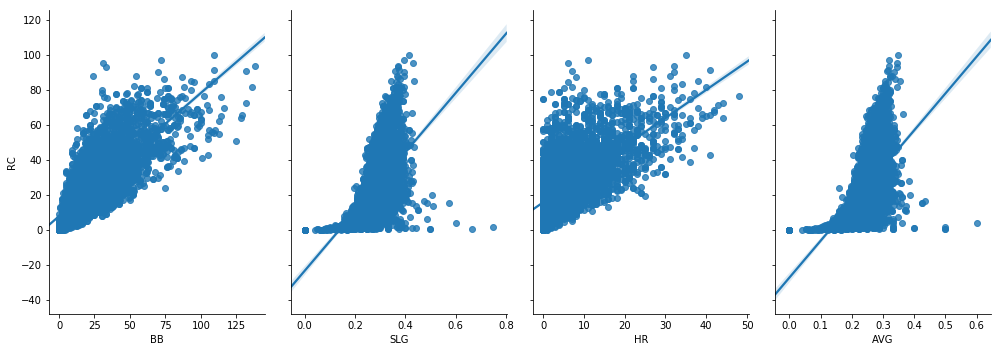

In [31]:
##seaborn as sns
sns.pairplot(clutch_inf_30, x_vars = ['BB','SLG','HR','AVG'], y_vars = 'RC', height = 5, aspect = 0.7, kind = 'reg')

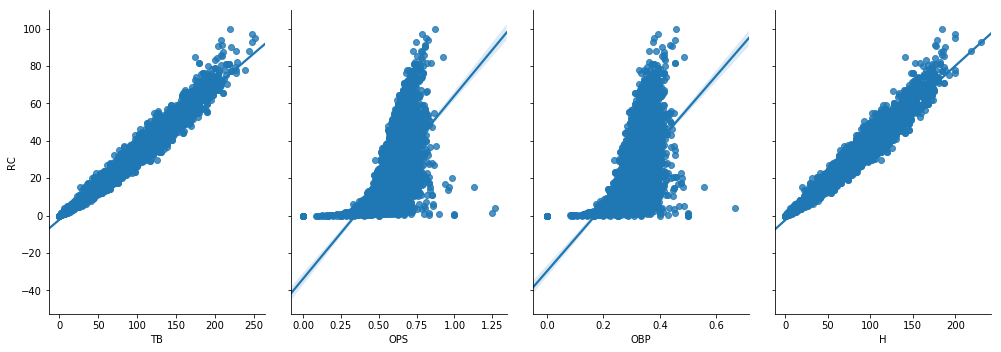

In [32]:
sns.pairplot(clutch_inf_30, x_vars = ['TB','OPS','OBP','H'], y_vars = 'RC', height = 5, aspect = 0.7, kind = 'reg')

### Non- All Star Infielders who have played at least 100 games at their position

In [33]:
query="""
select "playerID", "POS", "yearID", "G"
from fielding 
where "yearID" >= '1947'
and "POS" in ('3B','SS','2B','1B')
and "G" >= 100
and "playerID" not in 
   (Select "playerID"  ---count("playerID")
        from allstar_full
        group by "playerID"
        having count("playerID") > 5)
"""

Reg_Infielder_100 = pd.read_sql_query(query, conn)

### Merge Impact on Winning Percentage Stat with Player

In [35]:
Clutch_Infielder_100 =pd.merge(Clutch, Reg_Infielder_100, on = ["playerID", "yearID"])

In [36]:
Clutch_Infielder_100.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G
0,1950.0,boonera01,438.0,0.009897,-0.012388,SS,102.0
1,1950.0,peskyjo01,564.0,0.014124,-0.011122,3B,116.0
2,1950.0,colemje01,573.0,0.010755,-0.012328,2B,152.0
3,1950.0,hamnegr01,681.0,0.011615,-0.011743,SS,157.0
4,1950.0,priddje01,611.0,0.013910,-0.011132,2B,157.0


### Merge with other offensive stats

In [37]:
pd.merge(Clutch_Infielder_100, Batting_Stats, on = ["playerID", "yearID"])

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,boonera01,438.0,0.009897,-0.012388,SS,102.0,Ray,Boone,1923.0,...,53.0,7.0,58.0,0.301370,90.0,118.0,0.323288,0.397163,0.720451,46.865248
1,1950.0,peskyjo01,564.0,0.014124,-0.011122,3B,116.0,Johnny,Pesky,1919.0,...,112.0,1.0,49.0,0.312245,125.0,169.0,0.344898,0.437396,0.782294,73.919866
2,1950.0,colemje01,573.0,0.010755,-0.012328,2B,152.0,Jerry,Coleman,1924.0,...,69.0,6.0,69.0,0.287356,125.0,163.0,0.312261,0.371622,0.683882,60.574324
3,1950.0,hamnegr01,681.0,0.011615,-0.011743,SS,157.0,Granny,Hamner,1927.0,...,78.0,11.0,82.0,0.270016,140.0,194.0,0.304553,0.314159,0.618712,60.946903
4,1950.0,priddje01,611.0,0.013910,-0.011132,2B,157.0,Jerry,Priddy,1919.0,...,104.0,13.0,75.0,0.276699,139.0,191.0,0.309061,0.375698,0.684760,71.758380
5,1950.0,hattogr01,534.0,0.014792,-0.007748,3B,126.0,Grady,Hatton,1922.0,...,67.0,11.0,54.0,0.260274,96.0,130.0,0.296804,0.365949,0.662753,47.573386
6,1950.0,coxbi02,506.0,0.009076,-0.011218,3B,107.0,Billy,Cox,1919.0,...,62.0,8.0,44.0,0.257206,97.0,131.0,0.290466,0.310700,0.601165,40.701646
7,1950.0,rizzuph01,703.0,0.010255,-0.014518,SS,155.0,Phil,Rizzuto,1917.0,...,125.0,7.0,66.0,0.324149,157.0,229.0,0.371151,0.417598,0.788748,95.629888
8,1950.0,robined01,522.0,0.016279,-0.012137,1B,119.0,Eddie,Robinson,1920.0,...,21.0,1.0,13.0,0.232558,24.0,32.0,0.248062,0.365385,0.613447,11.692308
9,1950.0,robined01,522.0,0.016279,-0.012137,1B,119.0,Eddie,Robinson,1920.0,...,62.0,20.0,73.0,0.313679,120.0,142.0,0.334906,0.404908,0.739814,57.496933


In [38]:
clutch_inf_100 = pd.merge(Clutch_Infielder_100, Batting_Stats, on = ["playerID", "yearID"])

In [39]:
clutch_inf_100.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,boonera01,438.0,0.009897,-0.012388,SS,102.0,Ray,Boone,1923.0,...,53.0,7.0,58.0,0.301370,90.0,118.0,0.323288,0.397163,0.720451,46.865248
1,1950.0,peskyjo01,564.0,0.014124,-0.011122,3B,116.0,Johnny,Pesky,1919.0,...,112.0,1.0,49.0,0.312245,125.0,169.0,0.344898,0.437396,0.782294,73.919866
2,1950.0,colemje01,573.0,0.010755,-0.012328,2B,152.0,Jerry,Coleman,1924.0,...,69.0,6.0,69.0,0.287356,125.0,163.0,0.312261,0.371622,0.683882,60.574324
3,1950.0,hamnegr01,681.0,0.011615,-0.011743,SS,157.0,Granny,Hamner,1927.0,...,78.0,11.0,82.0,0.270016,140.0,194.0,0.304553,0.314159,0.618712,60.946903
4,1950.0,priddje01,611.0,0.013910,-0.011132,2B,157.0,Jerry,Priddy,1919.0,...,104.0,13.0,75.0,0.276699,139.0,191.0,0.309061,0.375698,0.684760,71.758380


In [41]:
clutch_inf_100 = pd.merge(Clutch_Infielder_100, Batting_Stats, on = ["playerID", "yearID"])

In [42]:
clutch_inf_100.dropna(how = 'any', inplace = True)

In [43]:
clutch_inf_100.fillna(0).head(5)

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,boonera01,438.0,0.009897,-0.012388,SS,102.0,Ray,Boone,1923.0,...,53.0,7.0,58.0,0.301370,90.0,118.0,0.323288,0.397163,0.720451,46.865248
1,1950.0,peskyjo01,564.0,0.014124,-0.011122,3B,116.0,Johnny,Pesky,1919.0,...,112.0,1.0,49.0,0.312245,125.0,169.0,0.344898,0.437396,0.782294,73.919866
2,1950.0,colemje01,573.0,0.010755,-0.012328,2B,152.0,Jerry,Coleman,1924.0,...,69.0,6.0,69.0,0.287356,125.0,163.0,0.312261,0.371622,0.683882,60.574324
3,1950.0,hamnegr01,681.0,0.011615,-0.011743,SS,157.0,Granny,Hamner,1927.0,...,78.0,11.0,82.0,0.270016,140.0,194.0,0.304553,0.314159,0.618712,60.946903
4,1950.0,priddje01,611.0,0.013910,-0.011132,2B,157.0,Jerry,Priddy,1919.0,...,104.0,13.0,75.0,0.276699,139.0,191.0,0.309061,0.375698,0.684760,71.758380


In [44]:
clutch_inf_100.drop('G_y', axis = 1, inplace = True)

In [45]:
clutch_inf_100.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,boonera01,438.0,0.009897,-0.012388,SS,102.0,Ray,Boone,1923.0,...,53.0,7.0,58.0,0.301370,90.0,118.0,0.323288,0.397163,0.720451,46.865248
1,1950.0,peskyjo01,564.0,0.014124,-0.011122,3B,116.0,Johnny,Pesky,1919.0,...,112.0,1.0,49.0,0.312245,125.0,169.0,0.344898,0.437396,0.782294,73.919866
2,1950.0,colemje01,573.0,0.010755,-0.012328,2B,152.0,Jerry,Coleman,1924.0,...,69.0,6.0,69.0,0.287356,125.0,163.0,0.312261,0.371622,0.683882,60.574324
3,1950.0,hamnegr01,681.0,0.011615,-0.011743,SS,157.0,Granny,Hamner,1927.0,...,78.0,11.0,82.0,0.270016,140.0,194.0,0.304553,0.314159,0.618712,60.946903
4,1950.0,priddje01,611.0,0.013910,-0.011132,2B,157.0,Jerry,Priddy,1919.0,...,104.0,13.0,75.0,0.276699,139.0,191.0,0.309061,0.375698,0.684760,71.758380


In [46]:
clutch_inf_100.to_csv('clutch_inf_100.csv')

In [47]:
clutch_inf_100 = pd.read_csv('clutch_inf_100.csv', index_col= 0 )

In [48]:
clutch_inf_100.head() 

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,boonera01,438.0,0.009897,-0.012388,SS,102.0,Ray,Boone,1923.0,...,53.0,7.0,58.0,0.301370,90.0,118.0,0.323288,0.397163,0.720451,46.865248
1,1950.0,peskyjo01,564.0,0.014124,-0.011122,3B,116.0,Johnny,Pesky,1919.0,...,112.0,1.0,49.0,0.312245,125.0,169.0,0.344898,0.437396,0.782294,73.919866
2,1950.0,colemje01,573.0,0.010755,-0.012328,2B,152.0,Jerry,Coleman,1924.0,...,69.0,6.0,69.0,0.287356,125.0,163.0,0.312261,0.371622,0.683882,60.574324
3,1950.0,hamnegr01,681.0,0.011615,-0.011743,SS,157.0,Granny,Hamner,1927.0,...,78.0,11.0,82.0,0.270016,140.0,194.0,0.304553,0.314159,0.618712,60.946903
4,1950.0,priddje01,611.0,0.013910,-0.011132,2B,157.0,Jerry,Priddy,1919.0,...,104.0,13.0,75.0,0.276699,139.0,191.0,0.309061,0.375698,0.684760,71.758380


### Visualize data relationships using scatterplots

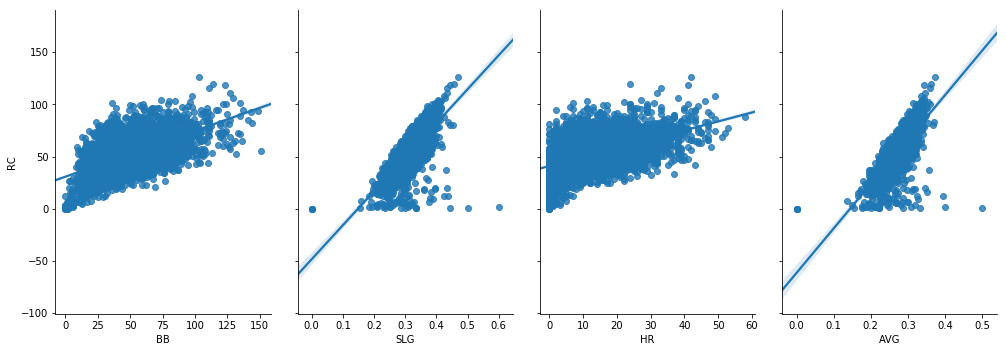

In [49]:
##seaborn as sns
sns.pairplot(clutch_inf_100, x_vars = ['BB','SLG','HR','AVG'], y_vars = 'RC', height = 5, aspect = 0.7, kind = 'reg')

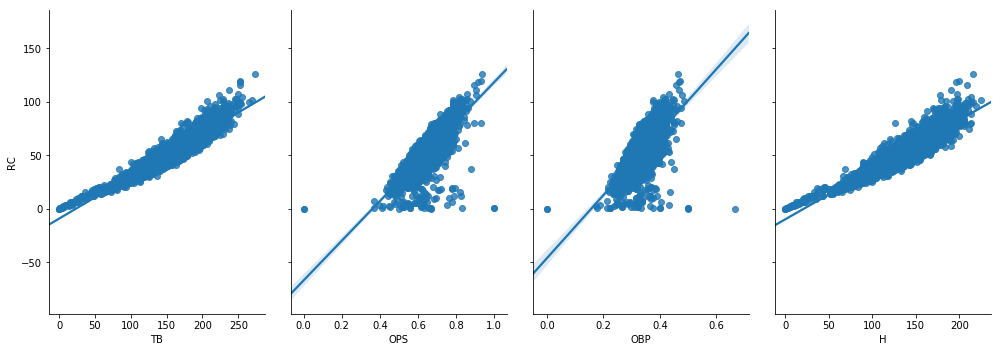

In [50]:
sns.pairplot(clutch_inf_100, x_vars = ['TB','OPS','OBP','H'], y_vars = 'RC', height = 5, aspect = 0.7, kind = 'reg')

### All Star Infielders who have played at least 100 games at their position

In [51]:
query="""
select "playerID", "POS", "yearID","G"
from fielding 
where "yearID" >= '1947'
and "POS" in ('3B','SS','2B','1B')
and "G" > 100
and "playerID" in  
        (Select "playerID"  ---count("playerID")
        from allstar_full
        group by "playerID"
        having count("playerID") > 5)
"""

All_Star_Infielder_100 = pd.read_sql_query(query, conn)

### Merge Impact on Winning Percentage Stat with Player

In [52]:
Clutch_Allstr_Infielder =pd.merge(Clutch, All_Star_Infielder_100, on = ["playerID", "yearID"])

In [53]:
Clutch_Allstr_Infielder.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G
0,1950.0,gordojo01,438.0,0.010324,-0.014679,2B,105.0
1,1950.0,reesepe01,648.0,0.013437,-0.011967,SS,134.0
2,1950.0,robinja02,655.0,0.015736,-0.016030,2B,144.0
3,1950.0,hodgegi01,676.0,0.013403,-0.014228,1B,153.0
4,1950.0,kellge01,614.0,0.014331,-0.012303,3B,157.0


### Merge with other offensive stats

In [55]:
allstr_clutch_inf = pd.merge(Clutch_Allstr_Infielder, Batting_Stats, on = ["playerID", "yearID"])

In [56]:
allstr_clutch_inf.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,gordojo01,438.0,0.010324,-0.014679,2B,105.0,Joe,Gordon,1915.0,...,59.0,19.0,57.0,0.236413,74.0,98.0,0.266304,0.340376,0.606680,33.356808
1,1950.0,reesepe01,648.0,0.013437,-0.011967,SS,134.0,Pee Wee,Reese,1918.0,...,97.0,11.0,52.0,0.259887,112.0,154.0,0.290019,0.369181,0.659200,56.853933
2,1950.0,robinja02,655.0,0.015736,-0.016030,2B,144.0,Jackie,Robinson,1919.0,...,99.0,14.0,81.0,0.328185,127.0,205.0,0.395753,0.422886,0.818638,86.691542
3,1950.0,hodgegi01,676.0,0.013403,-0.014228,1B,153.0,Gil,Hodges,1924.0,...,98.0,32.0,113.0,0.283422,131.0,183.0,0.326203,0.366929,0.693132,67.148031
4,1950.0,kellge01,614.0,0.014331,-0.012303,3B,157.0,George,Kell,1922.0,...,114.0,8.0,101.0,0.340094,156.0,268.0,0.418097,0.402542,0.820639,107.881356


In [57]:
allstr_clutch_inf.dropna(how = 'any', inplace = True)

In [58]:
allstr_clutch_inf.fillna(0).head(5)

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,gordojo01,438.0,0.010324,-0.014679,2B,105.0,Joe,Gordon,1915.0,...,59.0,19.0,57.0,0.236413,74.0,98.0,0.266304,0.340376,0.606680,33.356808
1,1950.0,reesepe01,648.0,0.013437,-0.011967,SS,134.0,Pee Wee,Reese,1918.0,...,97.0,11.0,52.0,0.259887,112.0,154.0,0.290019,0.369181,0.659200,56.853933
2,1950.0,robinja02,655.0,0.015736,-0.016030,2B,144.0,Jackie,Robinson,1919.0,...,99.0,14.0,81.0,0.328185,127.0,205.0,0.395753,0.422886,0.818638,86.691542
3,1950.0,hodgegi01,676.0,0.013403,-0.014228,1B,153.0,Gil,Hodges,1924.0,...,98.0,32.0,113.0,0.283422,131.0,183.0,0.326203,0.366929,0.693132,67.148031
4,1950.0,kellge01,614.0,0.014331,-0.012303,3B,157.0,George,Kell,1922.0,...,114.0,8.0,101.0,0.340094,156.0,268.0,0.418097,0.402542,0.820639,107.881356


In [59]:
allstr_clutch_inf.drop('G_y', axis = 1, inplace = True)

In [60]:
allstr_clutch_inf.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,gordojo01,438.0,0.010324,-0.014679,2B,105.0,Joe,Gordon,1915.0,...,59.0,19.0,57.0,0.236413,74.0,98.0,0.266304,0.340376,0.606680,33.356808
1,1950.0,reesepe01,648.0,0.013437,-0.011967,SS,134.0,Pee Wee,Reese,1918.0,...,97.0,11.0,52.0,0.259887,112.0,154.0,0.290019,0.369181,0.659200,56.853933
2,1950.0,robinja02,655.0,0.015736,-0.016030,2B,144.0,Jackie,Robinson,1919.0,...,99.0,14.0,81.0,0.328185,127.0,205.0,0.395753,0.422886,0.818638,86.691542
3,1950.0,hodgegi01,676.0,0.013403,-0.014228,1B,153.0,Gil,Hodges,1924.0,...,98.0,32.0,113.0,0.283422,131.0,183.0,0.326203,0.366929,0.693132,67.148031
4,1950.0,kellge01,614.0,0.014331,-0.012303,3B,157.0,George,Kell,1922.0,...,114.0,8.0,101.0,0.340094,156.0,268.0,0.418097,0.402542,0.820639,107.881356


In [61]:
allstr_clutch_inf.to_csv('allstr_clutch_inf.csv')

In [62]:
allstr_clutch_inf = pd.read_csv('allstr_clutch_inf.csv', index_col= 0 )

In [63]:
allstr_clutch_inf.head() 

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,gordojo01,438.0,0.010324,-0.014679,2B,105.0,Joe,Gordon,1915.0,...,59.0,19.0,57.0,0.236413,74.0,98.0,0.266304,0.340376,0.606680,33.356808
1,1950.0,reesepe01,648.0,0.013437,-0.011967,SS,134.0,Pee Wee,Reese,1918.0,...,97.0,11.0,52.0,0.259887,112.0,154.0,0.290019,0.369181,0.659200,56.853933
2,1950.0,robinja02,655.0,0.015736,-0.016030,2B,144.0,Jackie,Robinson,1919.0,...,99.0,14.0,81.0,0.328185,127.0,205.0,0.395753,0.422886,0.818638,86.691542
3,1950.0,hodgegi01,676.0,0.013403,-0.014228,1B,153.0,Gil,Hodges,1924.0,...,98.0,32.0,113.0,0.283422,131.0,183.0,0.326203,0.366929,0.693132,67.148031
4,1950.0,kellge01,614.0,0.014331,-0.012303,3B,157.0,George,Kell,1922.0,...,114.0,8.0,101.0,0.340094,156.0,268.0,0.418097,0.402542,0.820639,107.881356


### Visualize data relationships using scatterplots

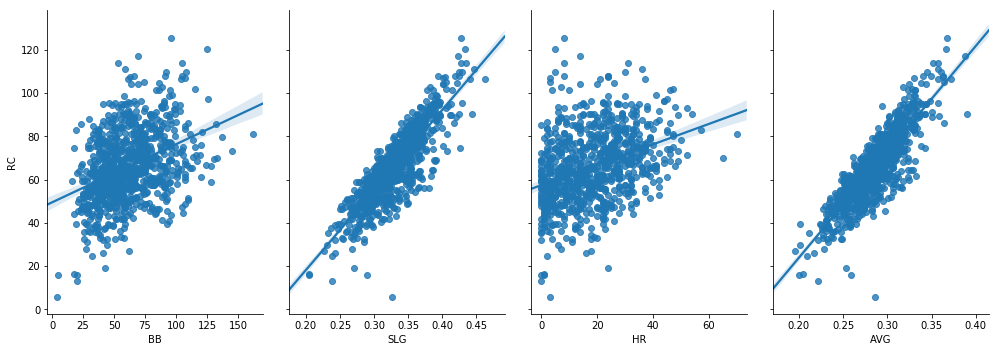

In [64]:
##seaborn as sns
sns.pairplot(allstr_clutch_inf, x_vars = ['BB','SLG','HR','AVG'], y_vars = 'RC', height = 5, aspect = 0.7, kind = 'reg')

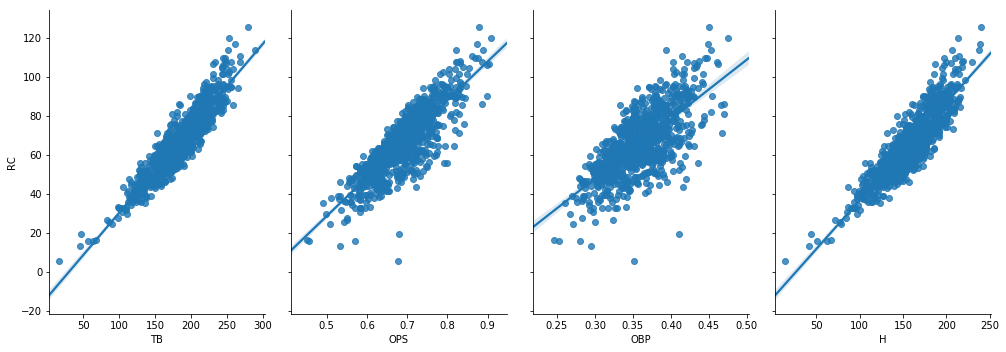

In [65]:
sns.pairplot(allstr_clutch_inf, x_vars = ['TB','OPS','OBP','H'], y_vars = 'RC', height = 5, aspect = 0.7, kind = 'reg')